# MusicXML Exploration with Music21
The following code attempts to understand and make notes about how .mxl and .xml files work with Music21.

### Imports

In [24]:
# imports and constants
import music21
from pprint import pprint
from difficulty import *
import warnings
import os
# import matplotlib.pyplot as plt
# from matplotlib import pyplot
import numpy as np
import pandas as pd

### Parsing

In [3]:
# score = music21.converter.parse("../music/Beethoven_Symphony_9__Op._125.mxl")

# This used to break, reporting the error:
# MusicXMLImportException: In part (Flauto piccolo), measure (959): found unknown MusicXML type: None
# Then I opened the file in MuseScore, had it ignore the issue, and exported it back out to .mxl, and overwrote the original
# Now, it works but takes FOREVER (generally more than 4 min)
# Additionally, it seems like 
# score = music21.converter.parse("../music/xml/Beethoven_Symphony_9__Op._125.mxl")


# score = music21.converter.parse("../music/xml/Beethoven_Symphony_No._5_Op.67_Mvt._1.mscz.mxl")
# score = music21.converter.parse("../music/xml/Holst__The_Planets__Op._32.mxl")
score = music21.converter.parse("../music/xml/musicalion/mozart_concerto_bassoon_mvt_1.xml")

### Validating XML Files

In [ ]:
# Validate all of scores in the musicalion directory
# assign directory
count_good = 0
count_bad = 0
directory = '../music/xml/musicalion/'
# iterate through all the midi files in the directory
for filename in os.listdir(directory):
    if filename == ".DS_Store":
        continue
    try:
        f = os.path.join(directory, filename)
        # checking if it is a file
        if os.path.isfile(f):
            print(f)
            score = music21.converter.parse(f)
            count_good += 1
    except:
        print("Error parsing file: " + filename)
        count_bad += 1
    print("-----------------------------------------------------")
print("Good: " + str(count_good))
print("Bad: " + str(count_bad))

### Check for Bassoon Parts (Naming and Part Finding)

In [15]:
def is_bassoon_name(candidate):
    candidate_parts = candidate.split(" ")
    bsn_names = ["bassoon", "fagotti", "basson", "fagott", "fagotto", "fagot", "fagote", "dulcian"]
    for name in bsn_names:
        for part in candidate_parts:
            if part == name:
                return True
    return False

In [4]:
# find bassoon part in music21 score
import warnings


bsn_part = None
for part in score.parts:
    # print(part)
    # print(part.getInstrument().instrumentName)
    # print(part.getInstrument())
    # if is_bassoon_name(part.partName.lower()):
    instrument_name = part.getInstrument().instrumentName
    if instrument_name == "Bassoon":
        print(part.partName)
        bsn_part = part
        break
    if instrument_name == "Midi_71":
        part_name = part.getInstrument()
        warnings.warn("\nUsed Midi fallback detection (Midi_71)\nActual Part Name: {}".format(part_name))
        bsn_part = part
        break

if bsn_part == None:
    raise Exception("Bassoon part not found")

/var/folders/67/z2c_5yw12tbcjdhcbfkqwg0c0000gn/T/ipykernel_71015/2420026932.py:18: UserWarning: 
Used Midi fallback detection (Midi_71)
Actual Part Name: P3: Midi_71
  warnings.warn("\nUsed Midi fallback detection (Midi_71)\nActual Part Name: {}".format(part_name))


### Visualize the Data

In [51]:
score_list = []

# for part in score.parts:
#     instrument = part.getInstrument().instrumentName

for note in bsn_part.flat.notes:

    if note.isChord:
        start = note.offset
        measure = start/4 + 1
        duration = note.quarterLength

        for chord_note in note.pitches:
            pitch = chord_note.ps
            volume = note.volume.realized
            score_list.append([measure, duration, pitch, volume])

    else:
        start = note.offset
        measure = start/4 + 1
        duration = note.quarterLength
        pitch = note.pitch.ps
        volume = note.volume.realized
        score_list.append([measure, duration, pitch, volume])


# score_list = sorted(score, key=lambda x: (x[0], x[2]))
# print(score_list)


In [52]:
# data = np.cumsum(np.random.rand(1000)-0.5)
labels = ["Note " + str(i+1) for i in range(len(score_list))]
columns = ["Measure", "Duration", "Pitch", "Volume"]
df_data = np.array(score_list)
df1 = pd.DataFrame(df_data, columns=columns)
df1

,Measure,Duration,Pitch,Volume
0,2.0000,0.50,46.0,0.992124
1,2.1250,0.50,46.0,0.992124
2,2.2500,0.50,46.0,0.992124
3,2.3750,0.50,46.0,0.992124
4,2.5000,0.50,46.0,0.992124
...,...,...,...,...
1024,170.8750,0.25,62.0,0.992124
1025,170.9375,0.25,57.0,0.992124
1026,171.0000,1.00,58.0,0.992124
1027,171.2500,1.00,58.0,0.992124


In [53]:
df1.describe()

,Measure,Duration,Pitch,Volume
count,1029.000000,1029.000000,1029.000000,1029.000000
mean,90.308795,0.543003,56.461613,0.958539
std,48.655829,0.594210,5.986182,0.125983
min,2.000000,0.000000,34.000000,0.496062
25%,51.937500,0.250000,53.000000,0.992124
50%,90.750000,0.250000,58.000000,0.992124
75%,133.062500,0.500000,60.000000,0.992124
max,171.500000,4.000000,70.000000,1.000000


<AxesSubplot: >

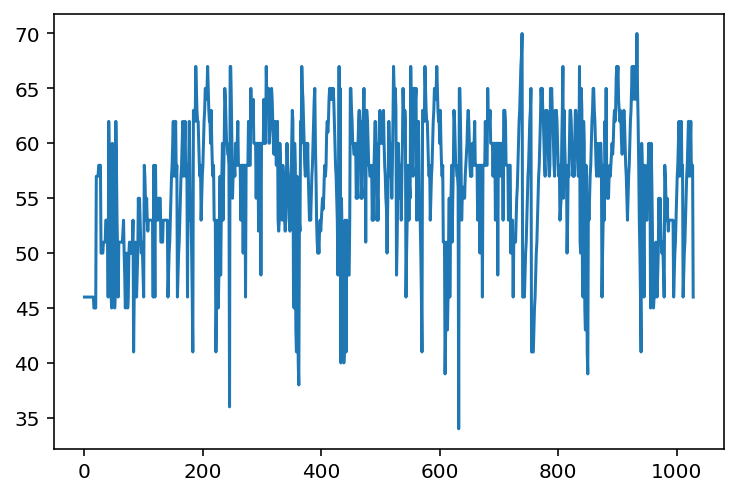

In [28]:
df1["Pitch"].plot()

<AxesSubplot: >

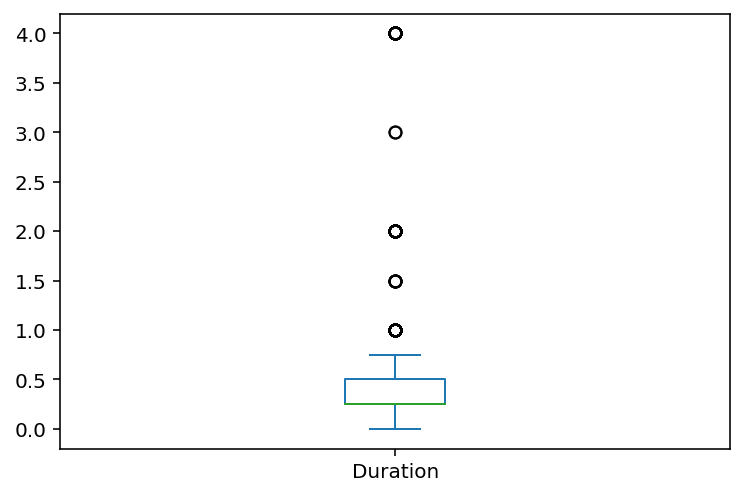

In [34]:
df1["Duration"].plot.box()
# df1["Pitch"].plot.box()
# df1["Volume"].plot.box()

array([<AxesSubplot: xlabel='Measure'>, <AxesSubplot: xlabel='Measure'>,
       <AxesSubplot: xlabel='Measure'>], dtype=object)

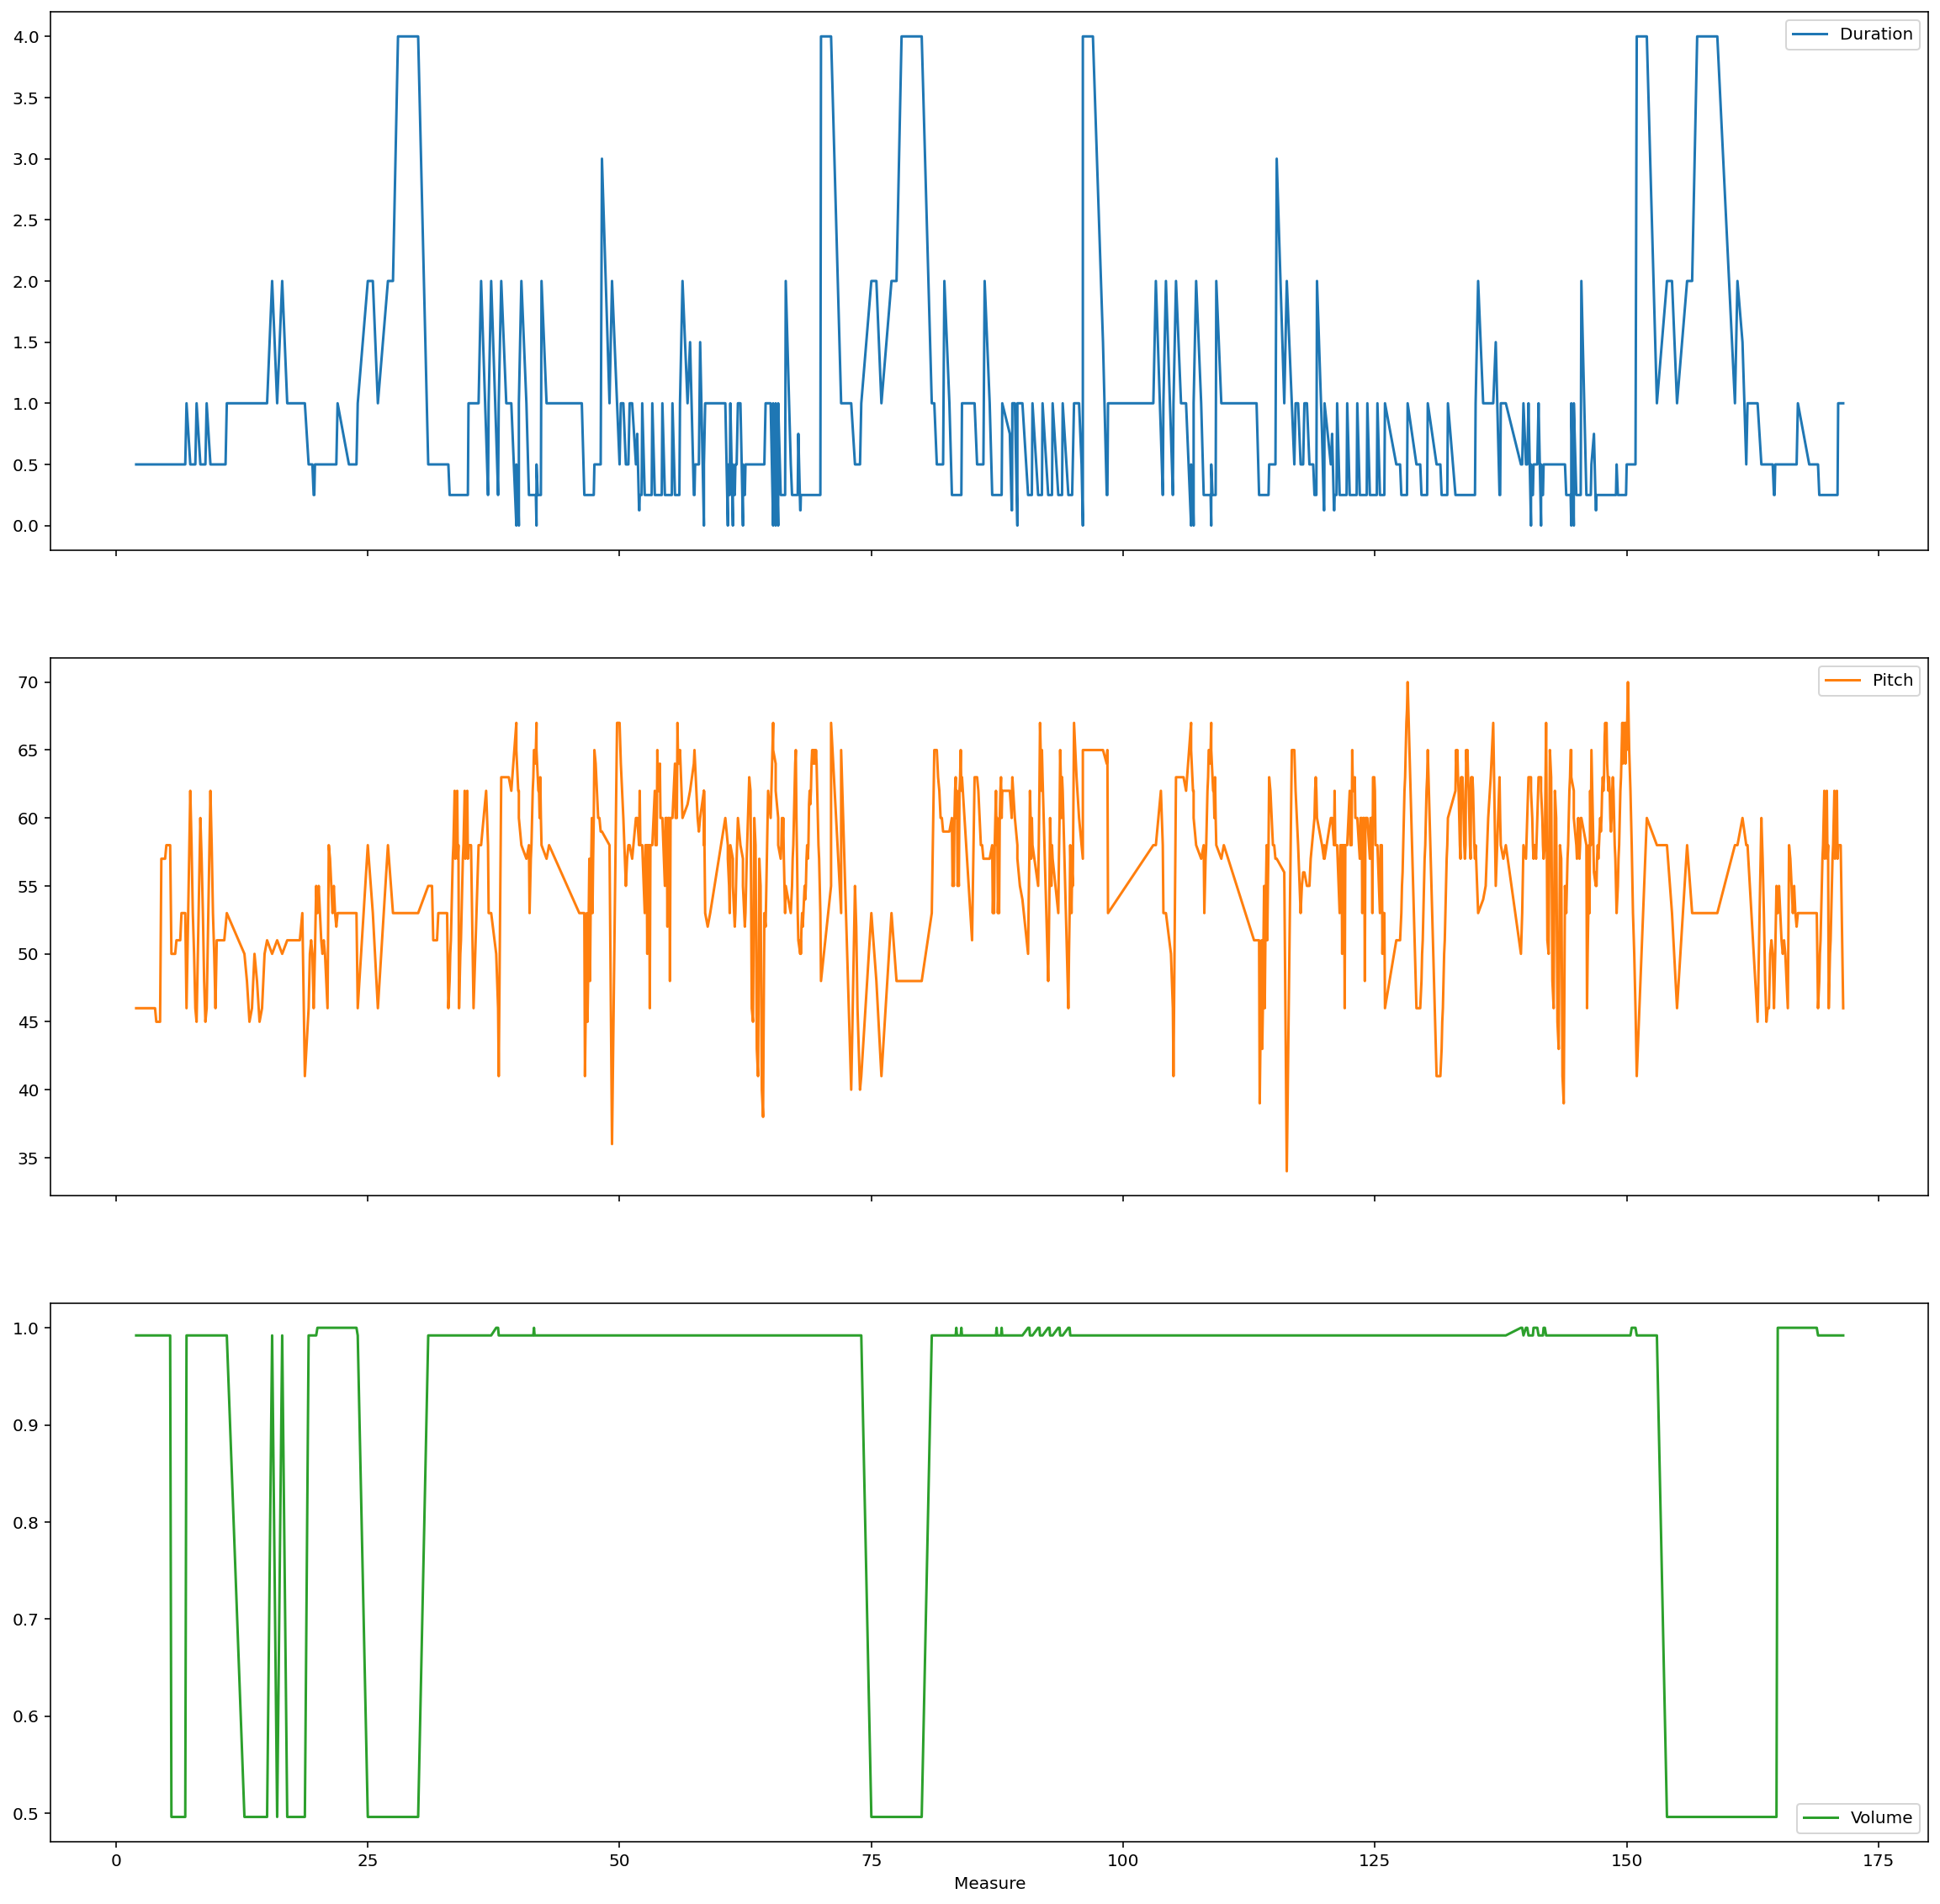

In [60]:
df1.plot(x="Measure", figsize=(20, 20), subplots=True)
# df1.plot(figsize=(20, 20), subplots=True)

# plt.show()

In [56]:
bsn_part.show('musicxml')

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(411) # nrows, ncols, plot_number, top sparkline
ax1.plot(score_list, 'b-')
# ax1.axhline(c='grey', alpha=0.5)

ax2 = fig.add_subplot(412, sharex=ax1) 
ax2.plot(score_list, 'g-')
# ax2.axhline(c='grey', alpha=0.5)

ax3 = fig.add_subplot(413, sharex=ax1)
ax3.plot(score_list, 'y-')
# ax3.axhline(c='grey', alpha=0.5)

ax4 = fig.add_subplot(414, sharex=ax1) # bottom sparkline
ax4.plot(score_list, 'r-')
# ax4.axhline(c='grey', alpha=0.5)


for axes in [ax1, ax2, ax3, ax4]: # remove all borders
    plt.setp(axes.get_xticklabels(), visible=False)
    plt.setp(axes.get_yticklabels(), visible=False)
    plt.setp(axes.get_xticklines(), visible=False)
    plt.setp(axes.get_yticklines(), visible=False)
    plt.setp(axes.spines.values(), visible=False)


# bottom sparkline
plt.setp(ax4.get_xticklabels(), visible=True)
plt.setp(ax4.get_xticklines(), visible=True)
ax4.xaxis.tick_bottom() # but onlyt the lower x ticks not x ticks at the top

plt.tight_layout()
plt.show()

In [57]:
bsn_part.show('musicXML')
# bsn_part.show()

In [ ]:
excerpt = bsn_part.measures(0, 30)
# excerpt.show()
for note in excerpt.flat:
    print(note.next)

In [45]:
# adds a note to a dict if not in it, increments if is in it
def note_record(note, notes):
    if note.nameWithOctave in notes:
        notes[note.nameWithOctave] += 1
        # notes[note.pitch] += 1
    else:
        notes[note.nameWithOctave] = 1
        # notes[note.pitch] = 1

# def note_record(note):
#     if note.pitch in notes_dict:
#         notes_dict[note.pitch] += 1
#     else:
#         notes_dict[note.pitch] = 1
        # if note.nameWithOctave == 'F#2':
        #     pprint(note.__dict__)

def inc_accidental(note, num):
    # check if it's in the key
    if note.pitch.accidental is not None:
        return num + 1
    return num


In [46]:
# Go through score and record the number of occurrences of each note
notes_dict_bassoon_1 = {}
note_pairs_dict_b1 = {}
notes_dict_bassoon_2 = {}
note_pairs_dict_b2 = {}
num_accidentals = 0
# fsharp = music21.note.Note('F#2')

for el in bsn_part.recurse().notes:
    if type(el)== music21.chord.Chord:
        sortedNotes = el.sortAscending()
        note_record(sortedNotes[0], notes_dict_bassoon_2)
        note_record(sortedNotes[1], notes_dict_bassoon_1)
        # for note in el.notes:
        #     note_record(note)
        #     num_accidentals = inc_accidental(note, num_accidentals)
                
    else:
        note_record(el, notes_dict_bassoon_2)
        note_record(el, notes_dict_bassoon_1)
        # note_record(el)
        # num_accidentals = inc_accidental(el, num_accidentals)

print("Number of accidentals:", num_accidentals) # I think this is wrong
print("-------------- Bassoon 1 --------------")
pprint(notes_dict_bassoon_1)
print("-------------- Bassoon 2 --------------")
pprint(notes_dict_bassoon_2)

Number of accidentals: 0
-------------- Bassoon 1 --------------
{'A-2': 17,
 'A-3': 22,
 'A-4': 3,
 'A2': 5,
 'A3': 32,
 'A4': 21,
 'B-2': 26,
 'B-3': 58,
 'B2': 1,
 'B3': 7,
 'C#4': 4,
 'C2': 4,
 'C3': 29,
 'C4': 91,
 'D-4': 71,
 'D3': 2,
 'D4': 17,
 'E-3': 3,
 'E-4': 27,
 'E3': 3,
 'E4': 12,
 'F#3': 2,
 'F#4': 5,
 'F2': 42,
 'F3': 39,
 'F4': 45,
 'G#3': 2,
 'G-3': 3,
 'G-4': 5,
 'G2': 6,
 'G3': 24,
 'G4': 50}
-------------- Bassoon 2 --------------
{'A-2': 18,
 'A-3': 42,
 'A2': 5,
 'A3': 48,
 'A4': 5,
 'B-2': 29,
 'B-3': 36,
 'B2': 1,
 'B3': 5,
 'C#3': 3,
 'C#4': 2,
 'C2': 18,
 'C3': 17,
 'C4': 76,
 'D-3': 17,
 'D-4': 33,
 'D3': 6,
 'D4': 10,
 'E-2': 1,
 'E-3': 12,
 'E-4': 24,
 'E3': 12,
 'E4': 26,
 'F#3': 7,
 'F#4': 4,
 'F-3': 1,
 'F2': 57,
 'F3': 40,
 'F4': 38,
 'G#3': 2,
 'G-3': 10,
 'G-4': 2,
 'G2': 6,
 'G3': 56,
 'G4': 9}
